<div class="alert alert-block alert-info">
<b><big><big><big>Parquet Reader</b> <br>
Weight Signals

In [1]:
%reset -f

In [2]:
# Specify Data Locations:
parquet_folder = '/home/sieglew/data/processed'
volts_stats = '/home/sieglew/data/Volts.pickle'

In [3]:
import os
import pandas as pd
import numpy as np
import pyarrow.parquet as pq 
import pickle
import random
import fastparquet
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from IPython.core.magic import register_cell_magic

In [4]:
@register_cell_magic
def skip(line, cell):   # cells can be skipped by using '%%skip' in the first line
    return

In [5]:
# import database statistics and complete list of files:
with open(volts_stats, 'rb') as handle:
    all_files, all_trips_soc, trips_sizes, trip_by_vehicle = pickle.load(handle) 

In [6]:
# randomly select 10 trip files:
sample = random.sample(all_files,10)

v_id983V14_trip260.parquet
v_id983V12_trip180_2.parquet
v_id983V17_trip199.parquet
v_id983V1_trip69.parquet
v_id983V16_trip140.parquet
v_id983V19_trip106.parquet
v_id983V14_trip164_2.parquet
v_id983V16_trip266.parquet
v_id983V1_trip42.parquet
v_id983V15_trip95_2.parquet


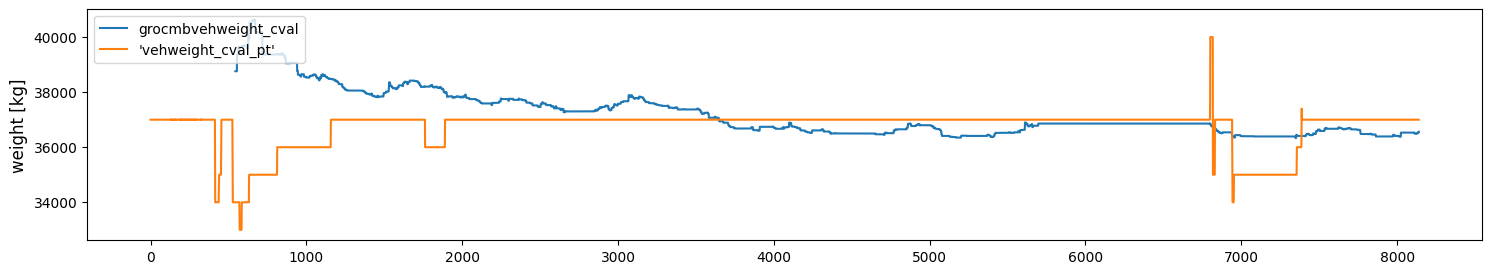

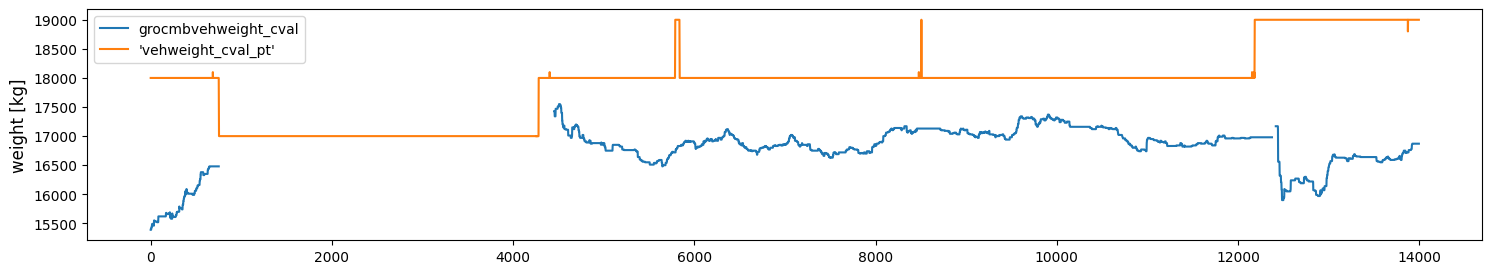

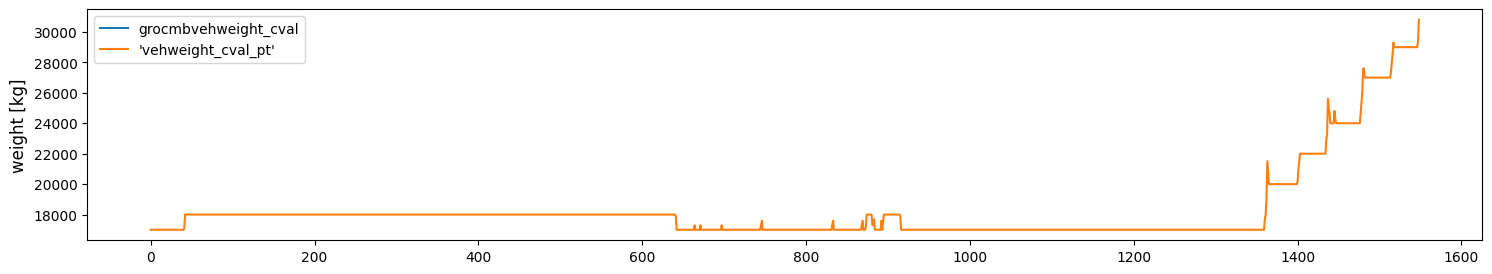

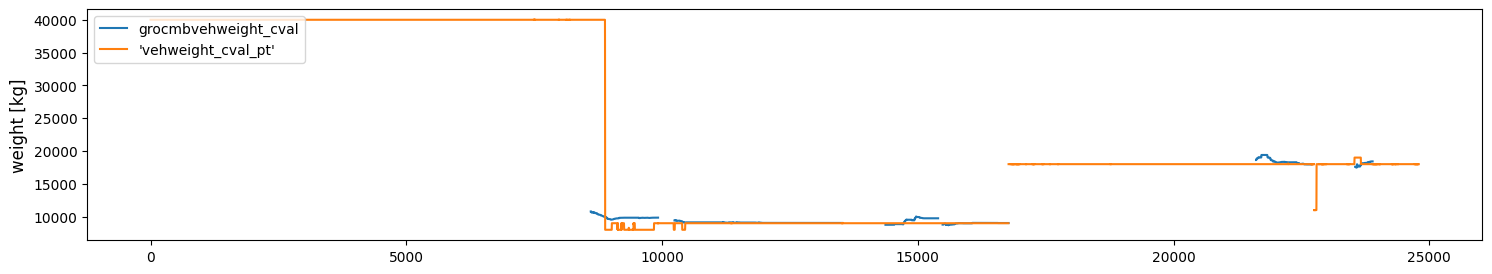

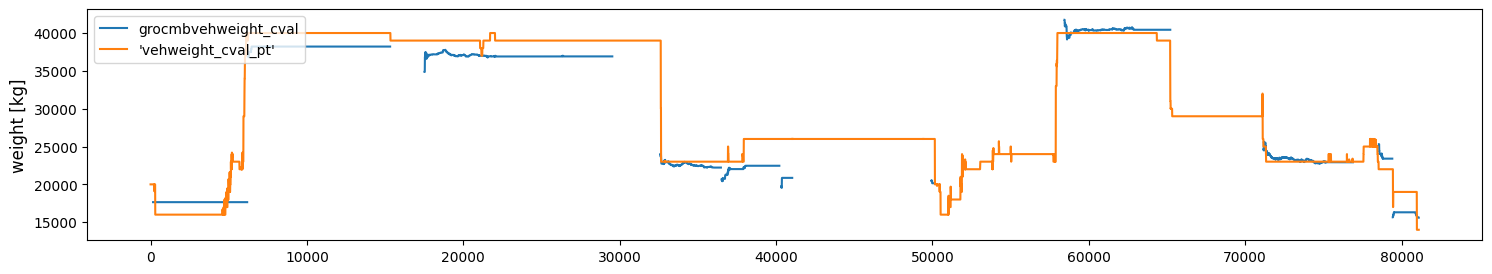

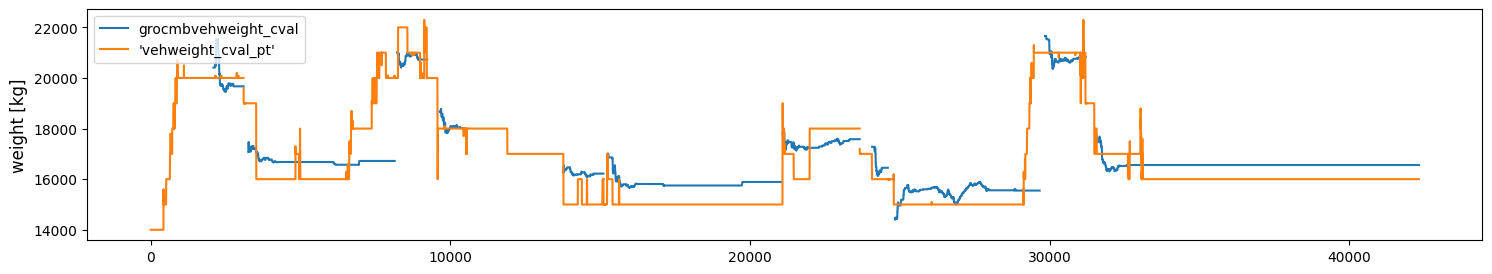

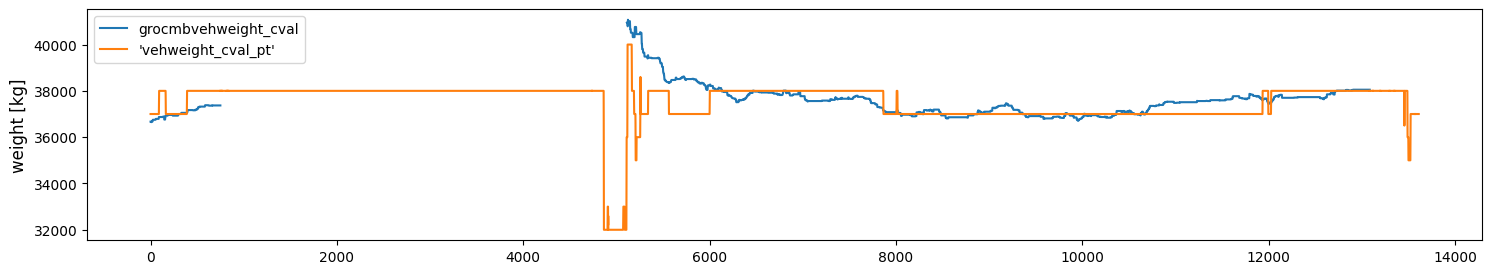

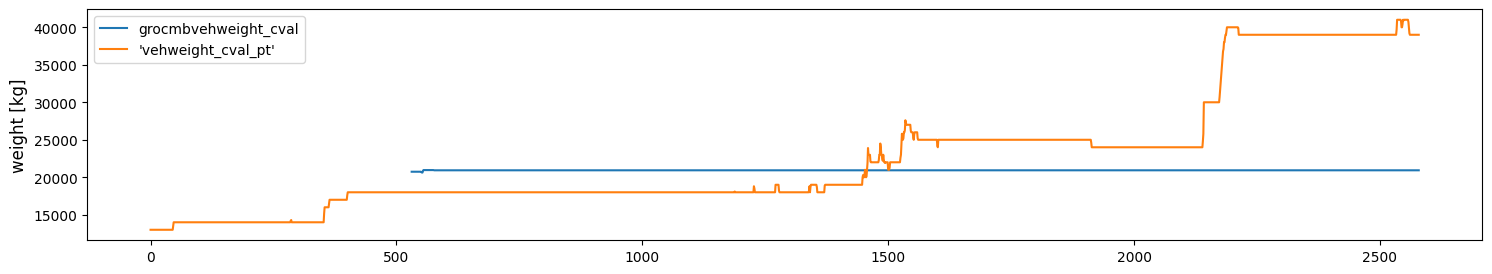

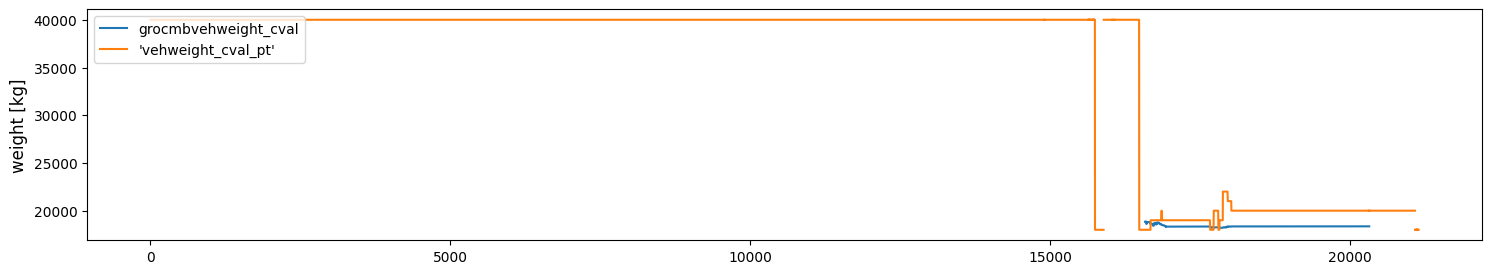

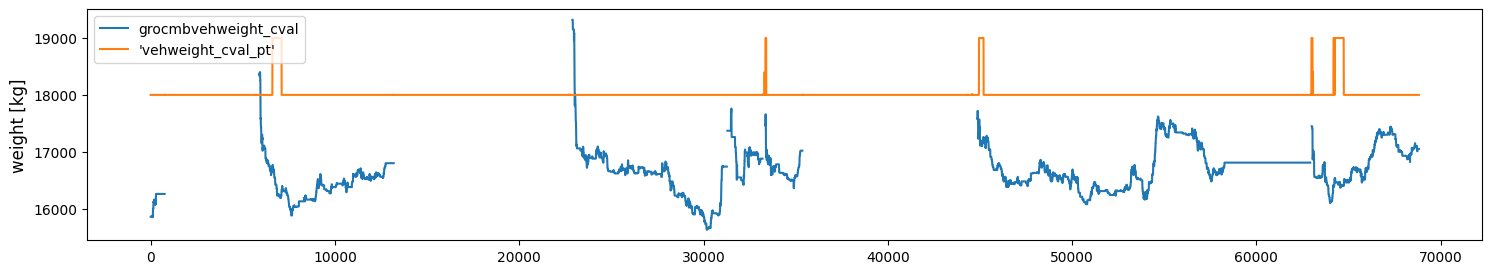

In [7]:
for f in sample:
    print(f)
    df = pd.read_parquet(parquet_folder + "/" + f, engine='fastparquet', columns = ["vehweight_cval_pt", "grocmbvehweight_cval"] )

    fig , axs = plt.subplots(1, sharex=True,figsize=(18, 3)) #gridspec_kw={'hspace': 0}
    #plt.suptitle('Vehicle Weight Signals', fontsize='12')
    axs.set_ylabel('weight [kg]', fontsize='12')

    #m_grocmb = savgol_filter(pd.DataFrame(df.grocmbvehweight_cval).to_numpy()[:,0], 1000,1)
    m_grocmb = pd.DataFrame(df.grocmbvehweight_cval)
    axs.plot(m_grocmb, label="grocmbvehweight_cval")

    m_vehweight =  df.vehweight_cval_pt*1000
    axs.plot(m_vehweight, label="'vehweight_cval_pt'")

    axs.legend(loc="upper left")